# Weighted Delta-Tracking with Scattering

This notebook requires the following repositories:

1. [`WDT_Analysis`](https://github.com/jsrehak/WDT_Analysis) containing the analysis module.
2. [`wdt_data`](https://github.com/jsrehak/wdt_data) containing the actual FOM run data.
3. [`wdt_cpu`](https://github.com/jsrehak/wdt_cpu) containing data used to calculate Cycles/CPU.

And the following dependencites:

1. [Pyne](https://pyne.io)

# Initalization

In [1]:
import analysis.wdt as wdt
import analysis.plot_tools as fom_plot
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rc,rcParams

/home/josh/lib/anaconda2/lib/python2.7/site-packages/pyne/serpent.py:11: QAWarning: pyne.serpent is not yet QA compliant.
  warn(__name__ + " is not yet QA compliant.", QAWarning)


Initialize locations of the `wdt_data` and `wdt_cpu` repositories, as well as a location to save figures generated. We also define a simple `bool` for if we want to save the final images, to make it easier to rerun and save images later. The `Plotter` object is used to make plots.

In [2]:
wdt_data_dir = '/home/josh/repos/_wdt/wdt_data/'
wdt_cpu_dir  = '/home/josh/repos/_wdt/wdt_cpu/'
img_dir = '/home/josh/repos/_publications/2017-wdt/img/rework/'
save = False # Do you want to save pictures
plot = fom_plot.Plotter()

# Fast Pin Cell

## Fast Cycles/CPU
Upload all the data for the Fast Pin Cell in the repository for cycles/CPU into a single `MultiRun` object. 

In [3]:
t_wdt = np.linspace(0.1,1,10)

base = wdt_cpu_dir + 'fast/S0100/'
dirs = [base + 'W' + str('{:0>4d}'.format(int(n*1000))) for n in t_wdt]
params = [{'st': 0.1, 'twdt': val} for val in t_wdt]
fast_cpu_mrun = wdt.MultiRun(dirs, params)

Uploaded 20 files.
Uploaded 186 files.
Uploaded 19 files.
Uploaded 19 files.
Uploaded 19 files.
Uploaded 132 files.
Uploaded 19 files.
Uploaded 524 files.
Uploaded 15 files.
Uploaded 117 files.


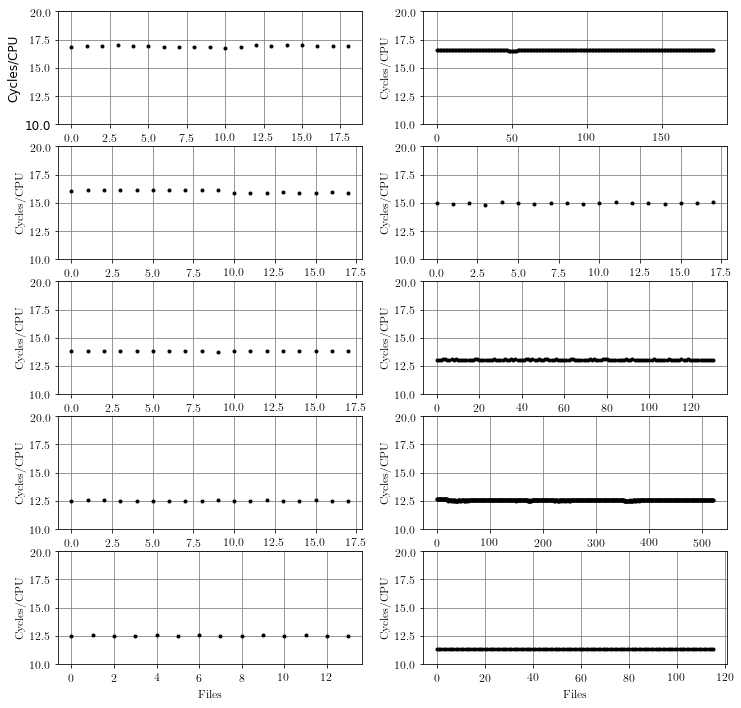

In [4]:
plt.figure(figsize=(12,12))
for i, run in enumerate(fast_cpu_mrun.runs):
    plt.subplot(5,2,i+1)
    plot.plot_cyc_v_cpu(run)
    plt.ylim([10,20])
plt.show()

The plots show consistant values, indicating that the CPU loading didn't change, and that the values of Cycles/CPU are probably good. We'll normalize to the base case, with no WDT.

In [113]:
xf = []
yf = []
for run in fast_cpu_mrun.runs:
    xf.append(run.params['twdt'])              # Get value of t_wdt
    yf.append(np.average(run.cyc_v_cpu()))     # Get average Cyc/CPU
ynf = np.divide(np.array(yf),yf[xf.index(0.1)])# Normalize to base case

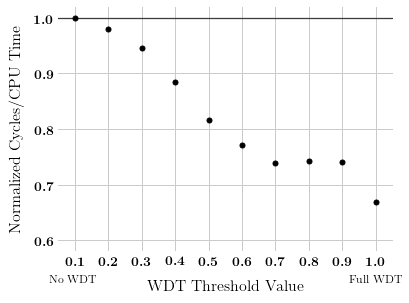

In [117]:
label_size=16
tick_size=14
save = True

#plt.figure(figsize=(6,4.5), facecolor='#f0f0f0')
plt.figure(figsize=(6,4.5))
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
#rc('axes', linewidth=2)
plt.rc('font', weight='normal')
#rcParams['text.latex.preamble'] = [r'\boldmath']
rcParams['text.latex.preamble'] = [r'\boldmath']
plt.plot(xf,ynf,'.k',ms=10)
plt.xlabel(r'WDT Threshold Value',
          fontsize=label_size)
plt.ylabel(r'Normalized Cycles/CPU Time', fontsize=label_size,
          labelpad=10)
plt.xticks(np.arange(0.1,1.1,0.1), fontsize=tick_size)
plt.yticks(np.arange(0.6,1.1,0.1), fontsize=tick_size)
plt.xlim([0.05,1.05])
plt.ylim([0.58,1.02])
plt.gca().xaxis.labelpad = 10
plt.grid(which='both', color='#cbcbcb',linestyle='-',linewidth=1.0)
plt.gca().set_axisbelow(True)
plt.gca().tick_params(axis=u'both',which=u'both',length=0)
#plt.gca().set_facecolor("#f0f0f0")
for spine in plt.gca().spines.values():
    spine.set_visible(False)
plt.axhline(y = 1.0, color = 'black', linewidth = 1.3, alpha = .7)
plt.figtext(0.16, 0.025, "No WDT", ha="center",fontsize=12)
plt.figtext(0.86, 0.025, "Full WDT", ha="center", fontsize=12)
if save:
    plt.savefig(img_dir + "fast_cyc_cpu_new.pdf",
               format = 'pdf', bbox_inches='tight')#,
               #facecolor='#f0f0f0')
plt.show()

## Average Real Collisions per Track
We will now upload all the actual data into a multi-run object. Note, this can take a while due to the large number of files.

In [3]:
t_wdt = np.linspace(0.1, 1, 10)

base = wdt_data_dir + 'fast_pincell/S0100/'
dirs = [base + 'W' + str('{:0>4d}'.format(int(n*1000))) for n in t_wdt]
params = [{'st': 0.1, 'twdt': val} for val in t_wdt]
fast_runs = wdt.MultiRun(dirs, params)

Uploaded 958 files.
Uploaded 486 files.
Uploaded 660 files.
Uploaded 465 files.
Uploaded 420 files.
Uploaded 784 files.
Uploaded 362 files.
Uploaded 366 files.
Uploaded 437 files.
Uploaded 492 files.


In [16]:
t_wdt = np.linspace(0.1, 1, 10)

base = wdt_data_dir + 'pwr/S0100/'
dirs = [base + 'W' + str('{:0>4d}'.format(int(n*1000))) for n in t_wdt]
params = [{'st': 0.1, 'twdt': val} for val in t_wdt]
pwr_runs = wdt.MultiRun(dirs, params)

Uploaded 1450 files.
Uploaded 630 files.
Uploaded 630 files.
Uploaded 582 files.
Uploaded 937 files.
Uploaded 911 files.
Uploaded 780 files.
Uploaded 1410 files.
Uploaded 1002 files.
Uploaded 403 files.


In [21]:
def new_plot(multirun, param):
    x = []
    y = []
    for run in multirun.runs:
        x.append(run.get_param('twdt'))
        dt_frac = []
        for f in run.files:
            dt_frac.append(f.get_data(param)[0][0])
        y.append(np.average(dt_frac))
        
    label_size=16
    tick_size=14
    save = True

    plt.figure(figsize=(6,4.5))
    plt.rc('text', usetex=True)
    plt.rc('font', family='serif')
    plt.rc('font', weight='normal')
    rcParams['text.latex.preamble'] = [r'\boldmath']

    plt.plot(x,y,'.k', ms=10)
    plt.xlim([0.05,1.05])
    plt.xticks(np.arange(0.1,1.1,0.1), fontsize=tick_size)
    plt.gca().xaxis.labelpad = 10
    plt.grid(which='both', color='#cbcbcb',linestyle='-',linewidth=1.0)
    plt.gca().set_axisbelow(True)
    plt.gca().tick_params(axis=u'both',which=u'both',length=0)
    for spine in plt.gca().spines.values():
        spine.set_visible(False)
    plt.axhline(y = 0, color = 'black', linewidth = 1.3, alpha = .7)
    plt.figtext(0.16, 0.025, "No WDT", ha="center",fontsize=12)
    plt.figtext(0.86, 0.025, "Full WDT", ha="center", fontsize=12)

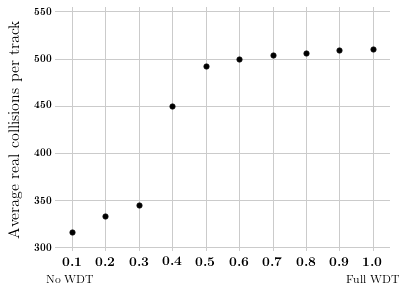

In [25]:
new_plot(pwr_runs, 'AVG_REAL_COL')
#plt.yticks(np.arange(60,160,20), fontsize=tick_size)
plt.ylim([295,555])
plt.ylabel(r'Average real collisions per track', fontsize=label_size, 
           labelpad=10)
plt.savefig(img_dir + "pwr_real_collisions_new.pdf",
            format = 'pdf', bbox_inches='tight')
plt.show()

In [32]:
u235_t = 259
u235_f = .623
u238_t = 10.4
u238_f = .914
H_t =  23.2
H_f = .143
O_t = 3.9
O_f = .709

In [33]:
(H_t + 2*O_t)/u235_t

0.11969111969111969

In [28]:
9.8*6.02e23/(238)*259

6.420152941176471e+24

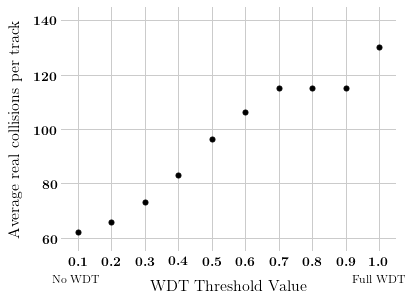

In [15]:
x = []
yr = []
for run in fast_runs.runs:
    x.append(run.get_param('twdt'))
    dt_frac = []
    for f in run.files:
        dt_frac.append(f.get_data('AVG_REAL_COL')[0][0])
    yr.append(np.average(dt_frac))
#ynv = np.divide(np.array(y),y[x.index(0.1)])# Normalize to base case

yv = []
for run in fast_runs.runs:
    dt_frac = []
    for f in run.files:
        dt_frac.append(f.get_data('AVG_VIRT_COL')[0][0])
    yv.append(np.average(dt_frac))
#ynr = np.divide(np.array(y),y[x.index(0.1)])# Normalize to base case

yt = [yr[i] + yv[i] for i in range(len(yr))]

label_size=16
tick_size=14
save = True

#plt.figure(figsize=(6,4.5), facecolor='#f0f0f0')
plt.figure(figsize=(6,4.5))
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
#rc('axes', linewidth=2)
plt.rc('font', weight='normal')
#rcParams['text.latex.preamble'] = [r'\boldmath']
rcParams['text.latex.preamble'] = [r'\boldmath']

#plt.plot(x,yv,'.k',ms=10)
#plt.plot(x,yr,'ok',ms=10, fillstyle='none')
plt.plot(x,yr,'.k', ms=10)

plt.ylabel(r'Average real collisions per track', fontsize=label_size,
          labelpad=10)
plt.xticks(np.arange(0.1,1.1,0.1), fontsize=tick_size)
plt.yticks(np.arange(60,160,20), fontsize=tick_size)
plt.xlim([0.05,1.05])
plt.ylim([55,145])
plt.gca().xaxis.labelpad = 10
plt.grid(which='both', color='#cbcbcb',linestyle='-',linewidth=1.0)
plt.gca().set_axisbelow(True)
plt.gca().tick_params(axis=u'both',which=u'both',length=0)
#plt.gca().set_facecolor("#f0f0f0")
for spine in plt.gca().spines.values():
    spine.set_visible(False)
plt.axhline(y = 0, color = 'black', linewidth = 1.3, alpha = .7)
#if save:
#    plt.savefig(img_dir + "fast_cyc_cpu_new.pdf",
#               format = 'pdf', bbox_inches='tight',
#               facecolor='#f0f0f0')
#plt.figtext(0.5, 0.2, "More WDT", fontsize=14,
#           ha="center")
#plt.figtext(0.6, 0.205, "$\longrightarrow$", fontsize=14,
#           ha="left")
plt.figtext(0.16, 0.025, "No WDT", ha="center",fontsize=12)
plt.figtext(0.86, 0.025, "Full WDT", ha="center", fontsize=12)
plt.xlabel(r'WDT Threshold Value',
          fontsize=label_size, labelpad=10)
if save:
    plt.savefig(img_dir + "fast_real_collisions_new.pdf",
               format = 'pdf', bbox_inches='tight')#,
#               #facecolor='#f0f0f0')
plt.show()

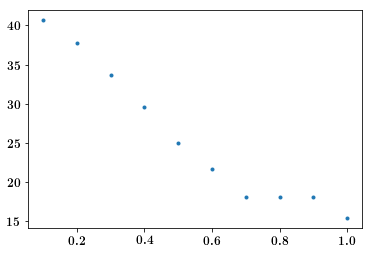

In [45]:
x = []
y = []
yerr=[]
for run in fast_runs.runs:
    x.append(run.get_param('twdt'))
    dt_frac = []
    for f in run.files:
        dt_frac.append(f.get_data('AVG_VIRT_COL')[0][0])
    y.append(np.average(dt_frac))
    yerr.append(np.std(dt_frac))
yn = np.divide(np.array(y),y[x.index(0.1)])# Normalize to base case
plt.errorbar(x,y,yerr=yerr,fmt='.')
plt.show()

<Figure size 432x324 with 0 Axes>

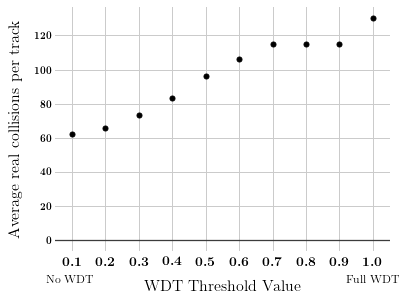

In [122]:
x = []
y = []
yerr=[]
for run in fast_runs.runs:
    x.append(run.get_param('twdt'))
    dt_frac = []
    for f in run.files:
        dt_frac.append(f.get_data('AVG_REAL_COL')[0][0])
    y.append(np.average(dt_frac))
    yerr.append(np.std(dt_frac))
yn = np.divide(np.array(y),y[x.index(0.1)])# Normalize to base case

label_size=16
tick_size=14
save = True

plt.figure(figsize=(6,4.5), facecolor='#f0f0f0')
plt.figure(figsize=(6,4.5))
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
#rc('axes', linewidth=2)
plt.rc('font', weight='normal')
#rcParams['text.latex.preamble'] = [r'\boldmath']
rcParams['text.latex.preamble'] = [r'\boldmath']
#plt.plot(xf,ynf,'.k',ms=10)
plt.errorbar(x,y,yerr=yerr,fmt='.k', ms=10)

plt.ylabel(r'Average real collisions per track', fontsize=label_size,
          labelpad=10)
plt.xticks(np.arange(0.1,1.1,0.1), fontsize=tick_size)
#plt.yticks(np.arange(0.6,1.1,0.1), fontsize=tick_size)
plt.xlim([0.05,1.05])
#plt.ylim([-2,45])
plt.gca().xaxis.labelpad = 10
plt.grid(which='both', color='#cbcbcb',linestyle='-',linewidth=1.0)
plt.gca().set_axisbelow(True)
plt.gca().tick_params(axis=u'both',which=u'both',length=0)
#plt.gca().set_facecolor("#f0f0f0")
for spine in plt.gca().spines.values():
    spine.set_visible(False)
plt.axhline(y = 0, color = 'black', linewidth = 1.3, alpha = .7)
#if save:
#    plt.savefig(img_dir + "fast_cyc_cpu_new.pdf",
#               format = 'pdf', bbox_inches='tight',
#               facecolor='#f0f0f0')
#plt.figtext(0.5, 0.2, "More WDT", fontsize=14,
#           ha="center")
#plt.figtext(0.6, 0.205, "$\longrightarrow$", fontsize=14,
#           ha="left")
plt.figtext(0.16, 0.025, "No WDT", ha="center",fontsize=12)
plt.figtext(0.86, 0.025, "Full WDT", ha="center", fontsize=12)
plt.xlabel(r'WDT Threshold Value',
          fontsize=label_size, labelpad=10)
#if save:
#    plt.savefig(img_dir + "fast_virtual_collisions_new.pdf",
#               format = 'pdf', bbox_inches='tight')#,
#               #facecolor='#f0f0f0')
plt.show()

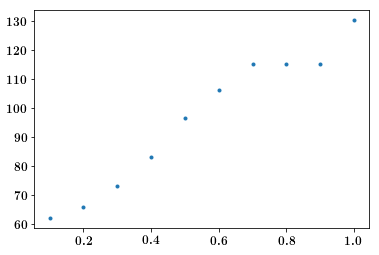

In [52]:
to_plot='AVG_REAL_COL'
x = []
y = []
yerr = []
for run in fast_runs.runs:
    x.append(run.get_param('twdt'))
    dt_frac = []
    for f in run.files:
        dt_frac.append(f.get_data(to_plot)[0][0])
    y.append(np.average(dt_frac))
    yerr.append(np.std(dt_frac))
yn = np.divide(np.array(y),y[x.index(0.1)])# Normalize to base case
plt.errorbar(x,y,yerr=yerr,fmt='.')
plt.show()

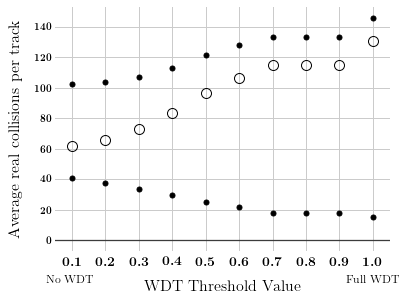

In [138]:
x = []
yr = []
for run in fast_runs.runs:
    x.append(run.get_param('twdt'))
    dt_frac = []
    for f in run.files:
        dt_frac.append(f.get_data('AVG_REAL_COL')[0][0])
    yr.append(np.average(dt_frac))
#ynv = np.divide(np.array(y),y[x.index(0.1)])# Normalize to base case

yv = []
for run in fast_runs.runs:
    dt_frac = []
    for f in run.files:
        dt_frac.append(f.get_data('AVG_VIRT_COL')[0][0])
    yv.append(np.average(dt_frac))
#ynr = np.divide(np.array(y),y[x.index(0.1)])# Normalize to base case

yt = [yr[i] + yv[i] for i in range(len(yr))]

label_size=16
tick_size=14
save = True

#plt.figure(figsize=(6,4.5), facecolor='#f0f0f0')
plt.figure(figsize=(6,4.5))
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
#rc('axes', linewidth=2)
plt.rc('font', weight='normal')
#rcParams['text.latex.preamble'] = [r'\boldmath']
rcParams['text.latex.preamble'] = [r'\boldmath']

plt.plot(x,yv,'.k',ms=10)
plt.plot(x,yr,'ok',ms=10, fillstyle='none')
plt.plot(x,yt,'.k', ms=10)

plt.ylabel(r'Average real collisions per track', fontsize=label_size,
          labelpad=10)
plt.xticks(np.arange(0.1,1.1,0.1), fontsize=tick_size)
#plt.yticks(np.arange(0.6,1.1,0.1), fontsize=tick_size)
plt.xlim([0.05,1.05])
#plt.ylim([-2,45])
plt.gca().xaxis.labelpad = 10
plt.grid(which='both', color='#cbcbcb',linestyle='-',linewidth=1.0)
plt.gca().set_axisbelow(True)
plt.gca().tick_params(axis=u'both',which=u'both',length=0)
#plt.gca().set_facecolor("#f0f0f0")
for spine in plt.gca().spines.values():
    spine.set_visible(False)
plt.axhline(y = 0, color = 'black', linewidth = 1.3, alpha = .7)
#if save:
#    plt.savefig(img_dir + "fast_cyc_cpu_new.pdf",
#               format = 'pdf', bbox_inches='tight',
#               facecolor='#f0f0f0')
#plt.figtext(0.5, 0.2, "More WDT", fontsize=14,
#           ha="center")
#plt.figtext(0.6, 0.205, "$\longrightarrow$", fontsize=14,
#           ha="left")
plt.figtext(0.16, 0.025, "No WDT", ha="center",fontsize=12)
plt.figtext(0.86, 0.025, "Full WDT", ha="center", fontsize=12)
plt.xlabel(r'WDT Threshold Value',
          fontsize=label_size, labelpad=10)
#if save:
#    plt.savefig(img_dir + "fast_virtual_collisions_new.pdf",
#               format = 'pdf', bbox_inches='tight')#,
#               #facecolor='#f0f0f0')
plt.show()

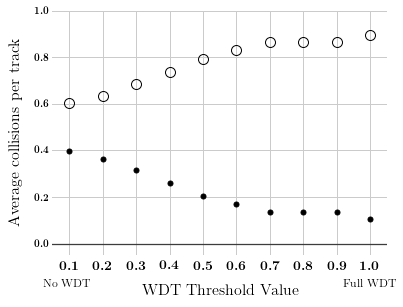

In [7]:
x = []
yr = []
for run in fast_runs.runs:
    x.append(run.get_param('twdt'))
    dt_frac = []
    for f in run.files:
        dt_frac.append(f.get_data('AVG_REAL_COL')[0][0])
    yr.append(np.average(dt_frac))
#ynv = np.divide(np.array(y),y[x.index(0.1)])# Normalize to base case

yv = []
for run in fast_runs.runs:
    dt_frac = []
    for f in run.files:
        dt_frac.append(f.get_data('AVG_VIRT_COL')[0][0])
    yv.append(np.average(dt_frac))
#ynr = np.divide(np.array(y),y[x.index(0.1)])# Normalize to base case

yt = [yr[i] + yv[i] for i in range(len(yr))]
yrp = [yr[i]/yt[i] for i in range(len(yr))]
yvp = [yv[i]/yt[i] for i in range(len(yr))]

label_size=16
tick_size=14
save = True

#plt.figure(figsize=(6,4.5), facecolor='#f0f0f0')
plt.figure(figsize=(6,4.5))
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
#rc('axes', linewidth=2)
plt.rc('font', weight='normal')
#rcParams['text.latex.preamble'] = [r'\boldmath']
rcParams['text.latex.preamble'] = [r'\boldmath']

plt.plot(x,yvp,'.k',ms=10)
plt.plot(x,yrp,'ok',ms=10, fillstyle='none')
#plt.plot(x,yt,'.k', ms=10)

plt.ylabel(r'Average collisions per track', fontsize=label_size,
          labelpad=10)
plt.xticks(np.arange(0.1,1.1,0.1), fontsize=tick_size)
#plt.yticks(np.arange(0.6,1.1,0.1), fontsize=tick_size)
plt.xlim([0.05,1.05])
plt.ylim([-0.05,1])
plt.gca().xaxis.labelpad = 10
plt.grid(which='both', color='#cbcbcb',linestyle='-',linewidth=1.0)
plt.gca().set_axisbelow(True)
plt.gca().tick_params(axis=u'both',which=u'both',length=0)
#plt.gca().set_facecolor("#f0f0f0")
for spine in plt.gca().spines.values():
    spine.set_visible(False)
plt.axhline(y = 0, color = 'black', linewidth = 1.3, alpha = .7)
#if save:
#    plt.savefig(img_dir + "fast_cyc_cpu_new.pdf",
#               format = 'pdf', bbox_inches='tight',
#               facecolor='#f0f0f0')
#plt.figtext(0.5, 0.2, "More WDT", fontsize=14,
#           ha="center")
#plt.figtext(0.6, 0.205, "$\longrightarrow$", fontsize=14,
#           ha="left")
plt.figtext(0.16, 0.025, "No WDT", ha="center",fontsize=12)
plt.figtext(0.86, 0.025, "Full WDT", ha="center", fontsize=12)
plt.xlabel(r'WDT Threshold Value',
          fontsize=label_size, labelpad=10)
#if save:
#    plt.savefig(img_dir + "fast_virtual_collisions_new.pdf",
#               format = 'pdf', bbox_inches='tight')#,
#               #facecolor='#f0f0f0')
plt.show()